In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bigmart = pd.read_csv("C:\Arun\Data/train_bm.csv")

In [4]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Item Visibility Visualization

<Axes: >

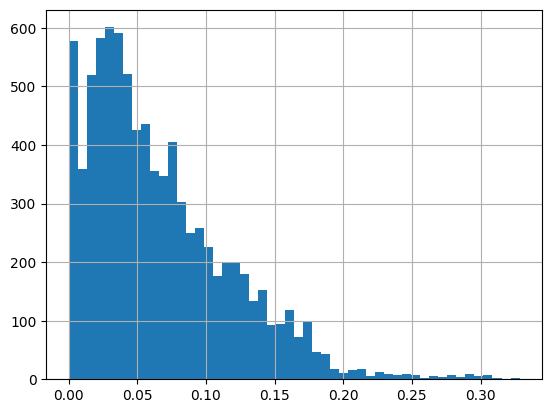

In [6]:
bigmart['Item_Visibility'].hist(bins=50)

**We see that its a right skewed distribution. In this case we can take the root or apply log function. Lets try using a square root.**  

In [7]:
item_visibility_squareroot = np.sqrt(bigmart['Item_Visibility'])

<Axes: >

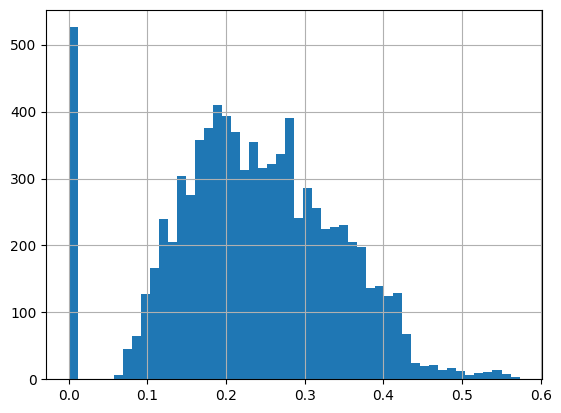

In [8]:
item_visibility_squareroot.hist(bins=50)

**The resultant is a normal distribution. Now lets use the log function.**  

In [9]:
item_visibility_log = np.log(bigmart['Item_Visibility'])

C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


** This Shows a warning - 'divide by zero encountered in log'. Lets look at the range of the values in the visibility column**

In [10]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

**The minimun value we have is 0, and log(0) is not defined. Thus its showing us an error. So lets add 0.1 to each value and then take the log**

<Axes: >

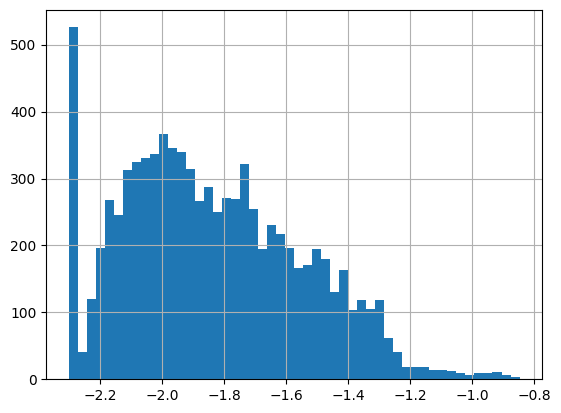

In [11]:
item_visibility_log = np.log(bigmart['Item_Visibility']+0.1)
item_visibility_log.hist(bins=50)

**Here we get the visibility in negatives. This is because the values in the column are less than 1.**

<Axes: >

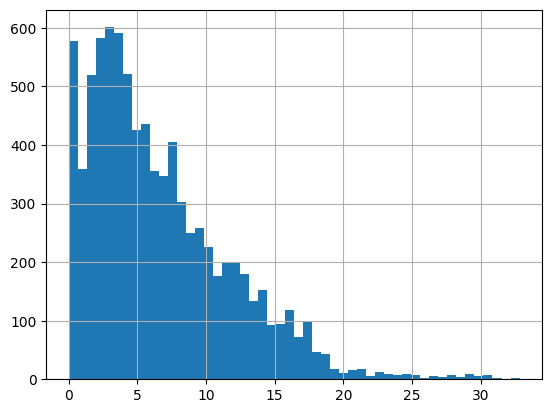

In [12]:
visibility = bigmart['Item_Visibility']*100
visibility.hist(bins=50)

**Now taking the log**

In [14]:
log_visibility = np.log(visibility+1)

<Axes: >

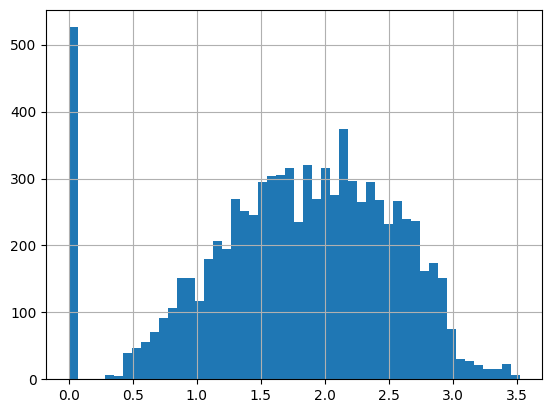

In [15]:
log_visibility.hist(bins=50)

In [18]:
import pandas as pd
import numpy as np

In [19]:
bigmart = pd.read_csv("C:\Arun\Data/train_bm.csv")

In [20]:
data = bigmart[['Item_Visibility', 'Item_MRP']]
data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


## Min Max Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


In [23]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8523.000000,8523.000000
mean,0.201382,0.465635
std,0.157123,0.264327
min,0.000000,0.000000
25%,0.082187,0.265437
50%,0.164228,0.474209
75%,0.288026,0.655156
max,1.000000,1.000000


## Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Item_Visibility', 'Item_MRP'])
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220


In [26]:
scaled_data.describe()

,Item_Visibility,Item_MRP
count,8.523000e+03,8.523000e+03
mean,1.517292e-16,-1.604828e-16
std,1.000059e+00,1.000059e+00
min,-1.281758e+00,-1.761688e+00
25%,-7.586531e-01,-7.574307e-01
50%,-2.364792e-01,3.243893e-02
75%,5.514755e-01,7.170372e-01
max,5.083050e+00,2.021724e+00


### Check datatypes of variables

In [27]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Encoding a single variable-  Outlet Type

In [28]:
bigmart['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [29]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


### Doing one hot encoding for all the variables 

In [30]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


We have two problems here: 

#### Problem 1:
Look at the newly created variables *'Outlet_Size_High 	Outlet_Size_Medium 	Outlet_Size_Small'*, the order between these variables is destroyed. As a result we are missing out on some important information.  

In [31]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,False
4,True,False,False


#### Problem 2
The number of features has increased from 12 to 1600, where maximum values are 0.

In [32]:
bigmart.shape, bigmart_encoded.shape

((8523, 12), (8523, 1605))

In [35]:
item_ids = ['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
            'DRC01', 'DRC12', 'DRC13', 'DRC24', 'DRC25', 'DRC27', 'DRC36', 'DRC49',
            'DRD01', 'DRD12', 'DRD13', 'DRD15', 'DRD24', 'DRD25', 'DRD27', 'DRD37', 'DRD49']

bigmart_filtered = bigmart[bigmart['Item_Identifier'].isin(item_ids)]
bigmart_filtered.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
103,DRB48,16.75,Regular,0.024833,Soft Drinks,38.7822,OUT013,1987,High,Tier 3,Supermarket Type1,667.7974
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
158,DRD24,13.85,Low Fat,0.030969,Soft Drinks,140.9154,OUT017,2007,NaN,Tier 2,Supermarket Type1,1701.7848
211,DRC27,13.80,Low Fat,0.058091,Dairy,245.1802,OUT035,2004,Small,Tier 2,Supermarket Type1,5650.6446


## Problem 1 solution

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
bigmart['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [38]:
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0])

In [39]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [40]:
bigmart['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

So that solves the first challenge we encountered. Now we'll see how to deal with high cardinality.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [42]:
bigmart = pd.read_csv("C:\Arun\Data/train_bm.csv")

In [43]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
bigmart.shape

(8523, 12)

In [45]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## One hot Encoding

In [46]:
bigmart['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [47]:
pd.get_dummies(bigmart['Outlet_Type']).head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


In [48]:
bigmart_encoded = pd.get_dummies(bigmart)
bigmart_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


We have two problems here: 

#### Problem 1:
Look at the newly created variables *'Outlet_Size_High 	Outlet_Size_Medium 	Outlet_Size_Small'*, the order between these variables is destroyed. As a result we are missing out on some important information.  

In [49]:
bigmart_encoded[['Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small']].head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,False
4,True,False,False


#### Problem 2
The number of features has increased from 12 to 1600, where maximum values are 0

In [50]:
bigmart_encoded.shape, bigmart.shape

((8523, 1605), (8523, 12))

In [51]:
bigmart_encoded[['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', 'Item_Identifier_DRB01',
       'Item_Identifier_DRB13', 'Item_Identifier_DRB24',
       'Item_Identifier_DRB25', 'Item_Identifier_DRB48',
       'Item_Identifier_DRC01', 'Item_Identifier_DRC12',
       'Item_Identifier_DRC13', 'Item_Identifier_DRC24',
       'Item_Identifier_DRC25', 'Item_Identifier_DRC27',
       'Item_Identifier_DRC36', 'Item_Identifier_DRC49',
       'Item_Identifier_DRD01', 'Item_Identifier_DRD12',
       'Item_Identifier_DRD13', 'Item_Identifier_DRD15',
       'Item_Identifier_DRD24', 'Item_Identifier_DRD25',
       'Item_Identifier_DRD27', 'Item_Identifier_DRD37',
       'Item_Identifier_DRD49']].head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Problem 1 solution - Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
bigmart['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [55]:
le = LabelEncoder()
le.fit_transform(['Small', 'Medium', 'High'])

array([2, 1, 0])

In [56]:
bigmart['Outlet_Size'] = bigmart['Outlet_Size'].map({'Small': 0,
                                                     'Medium': 1,
                                                     'High': 2})

In [57]:
bigmart['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

## Problem 2 solution

In [58]:
bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [59]:
bigmart['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64

In [60]:
temp= bigmart['Item_Identifier'].value_counts()
temp.head()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
Name: count, dtype: int64

In [61]:
bigmart['Item_identifier_count'] = bigmart['Item_Identifier'].apply(lambda x: temp[x])
bigmart[['Item_Identifier','Item_identifier_count']].head()

,Item_Identifier,Item_identifier_count
0,FDA15,8
1,DRC01,6
2,FDN15,7
3,FDX07,6
4,NCD19,6


In [62]:
for i in range(0, len(bigmart)):
    if bigmart['Item_identifier_count'][i] < 4:
        bigmart['Item_Identifier'][i] = 'other'

In [63]:
bigmart.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_identifier_count
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,8
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,7
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,6
5,other,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,Tier 3,Supermarket Type2,556.6088,3
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,2.0,Tier 3,Supermarket Type1,343.5528,8


In [64]:
 bigmart['Item_Identifier'].value_counts()

Item_Identifier
other    418
FDG33     10
FDW13     10
FDG09      9
FDF56      9
        ... 
FDG04      4
FDT02      4
FDN22      4
NCU53      4
FDD28      4
Name: count, Length: 1403, dtype: int64

In [1]:
import pandas as pd

In [2]:
stroke_data = pd.read_csv("C:\Arun\Data/stroke prediction.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Creating Bins

In [3]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [4]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


## Binning Using Decision Tree Split

In [5]:
bins=[0,49.5,66.5,77.5,90]
group=['Bin_1','Bin_2','Bin_3','Bin_4']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [6]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,Bin_1
1,58.0,Bin_2
2,8.0,Bin_1
3,70.0,Bin_3
4,14.0,Bin_1


In [7]:
import pandas as pd

In [8]:
loan_data = pd.read_csv("C:\Arun\Data/train_loan.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Feature 1 -Total Income

In [9]:
loan_data['Total_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome'] 
loan_data[['ApplicantIncome', 'CoapplicantIncome', 'Total_income']].head()

,ApplicantIncome,CoapplicantIncome,Total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


### Feature 2 - Loan amount and Income  Ratio

In [10]:
loan_data['loan_income_ratio'] = loan_data['LoanAmount'] / loan_data['ApplicantIncome']
loan_data[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,NaN,NaN
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


In [11]:
import pandas as pd

In [12]:
stroke_data = pd.read_csv("C:\Arun\Data/stroke prediction.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [13]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [14]:
stroke_data["smoking_status_NA"]=stroke_data["smoking_status"].isnull()*1

In [15]:
stroke_data[['smoking_status_NA', 'smoking_status']].head()

,smoking_status_NA,smoking_status
0,1,NaN
1,0,never smoked
2,1,NaN
3,0,formerly smoked
4,1,NaN


In [16]:
import pandas as pd

In [17]:
bigmart= pd.read_csv("C:\Arun\Data/train_bm.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
bigmart['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Frrequency Encoding

In [19]:
temp = bigmart['Item_Type'].value_counts()
temp.head()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64

In [20]:
bigmart['Item_type_count'] = bigmart['Item_Type'].apply(lambda x: temp[x])
bigmart[['Item_Identifier', 'Item_Type', 'Item_type_count']].head()

,Item_Identifier,Item_Type,Item_type_count
0,FDA15,Dairy,682
1,DRC01,Soft Drinks,445
2,FDN15,Meat,425
3,FDX07,Fruits and Vegetables,1232
4,NCD19,Household,910


## Mean Encoding (using Target Variable)

In [21]:
bigmart[['Item_Type', 'Item_Outlet_Sales']].head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [22]:
bigmart.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [23]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("C:\Arun\Data/No2 dataset.csv")
df.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [25]:
df['Date_Time'].max(), df['Date_Time'].min()

('31/08/2004 23.00.00', '01/04/2004 00.00.00')

In [26]:
df.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

### Convert to datetime

In [27]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format= '%d/%m/%Y %H.%M.%S')
df.dtypes

Date_Time    datetime64[ns]
NO2(GT)               int64
dtype: object

The format depends on your data. Here are a few examples

1. **1/12/2001**: %d/%m/%Y
2. **2001/12/1**: %Y/%m/%d
3. **2001-12-01**: %Y-%m-%d
4. **2001-12-01 09:00**: %Y-%m-%d %H:%M

In [28]:
df['Date_Time'].max(), df['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

### Extract hour and minute

In [29]:
df['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int32

In [30]:
df['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int32

### The day of week - Monday (0) to Sunday (6)

In [31]:
df['Date_Time'].dt.dayofweek.head(7) 

0    2
1    2
2    2
3    2
4    2
5    2
6    3
Name: Date_Time, dtype: int32

In [34]:
df['Date_Time'].dt.day_name().head(7)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
5    Wednesday
6     Thursday
Name: Date_Time, dtype: object

### Extracting the month from the date 

In [35]:
df['Date_Time'].dt.month.head(7)

0    3
1    3
2    3
3    3
4    3
5    3
6    3
Name: Date_Time, dtype: int32

In [36]:
df['Date_Time'].dt.is_month_end.head(7)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Date_Time, dtype: bool

### Put it all together

In [42]:
new_df = pd.DataFrame({
    "year": df['Date_Time'].dt.year,
    "month": df['Date_Time'].dt.month,
    "day": df['Date_Time'].dt.day,
    "hour": df['Date_Time'].dt.hour,
    "dayofyear": df['Date_Time'].dt.dayofyear,
    "week": df['Date_Time'].dt.isocalendar().week,
    "dayofweek": df['Date_Time'].dt.dayofweek,
    "dayofweekname": df['Date_Time'].dt.day_name(),
    "quarter": df['Date_Time'].dt.quarter,
})
new_df.head()

,year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004,3,10,18,70,11,2,Wednesday,1
1,2004,3,10,19,70,11,2,Wednesday,1
2,2004,3,10,20,70,11,2,Wednesday,1
3,2004,3,10,21,70,11,2,Wednesday,1
4,2004,3,10,22,70,11,2,Wednesday,1


In [43]:
complete_data = pd.concat([df, new_df], axis=1)
complete_data.head()

,Date_Time,NO2(GT),year,month,day,hour,dayofyear,week,dayofweek,dayofweekname,quarter
0,2004-03-10 18:00:00,166,2004,3,10,18,70,11,2,Wednesday,1
1,2004-03-10 19:00:00,1174,2004,3,10,19,70,11,2,Wednesday,1
2,2004-03-10 20:00:00,131,2004,3,10,20,70,11,2,Wednesday,1
3,2004-03-10 21:00:00,172,2004,3,10,21,70,11,2,Wednesday,1
4,2004-03-10 22:00:00,131,2004,3,10,22,70,11,2,Wednesday,1


In [44]:
complete_data['is_weekday']=0 

for i in range(0, len(complete_data)):
    if ((complete_data['dayofweek'][i] == 5) | (complete_data['dayofweek'][i] == 6)):
        complete_data['is_weekday'][i] = 0
    else: 
        complete_data['is_weekday'][i] = 1

In [45]:
complete_data[['dayofweek', 'is_weekday']].head()

,dayofweek,is_weekday
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


## Difference Between Dates

In [48]:
agent = pd.read_csv("C:\Arun\Data/agent_classification.csv")
agent.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [49]:
agent[['Application_Receipt_Date','Applicant_BirthDate']].head()

,Application_Receipt_Date,Applicant_BirthDate
0,4/16/2007,12/19/1971
1,4/16/2007,2/17/1983
2,4/16/2007,1/16/1966
3,4/16/2007,2/3/1988
4,4/16/2007,7/4/1985


In [50]:
agent['Application_Receipt_Date'] = pd.to_datetime(agent['Application_Receipt_Date'], format='%m/%d/%Y')
agent['Applicant_BirthDate'] = pd.to_datetime(agent['Applicant_BirthDate'], format='%m/%d/%Y')

In [51]:
(agent['Application_Receipt_Date'][0] - agent['Applicant_BirthDate'][0]).days

12902

In [52]:
agent['Applicant_age'] = agent.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days, axis=1)

In [53]:
agent

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_age
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0,12902.0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1,8824.0
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,5/27/2006,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0,15065.0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,8/21/2003,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0,7012.0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,5/8/2006,...,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0,7956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,FIN1009523,160017,2008-07-01,160032.0,M,1970-01-18,M,Salaried,Graduate,5/5/2008,...,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0,14044.0
9523,FIN1009524,848101,2008-07-01,848302.0,M,1956-09-11,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18921.0
9524,FIN1009525,753012,2008-07-01,753014.0,F,1975-08-07,M,Salaried,Graduate,8/22/2006,...,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0,12017.0
9525,FIN1009526,575003,2008-07-01,571248.0,M,1986-12-23,S,Salaried,Class XII,6/5/2008,...,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0,7861.0


In [60]:
import pandas as pd
import featuretools as ft

In [61]:
df = pd.read_csv("C:\Arun\Data/train_bm.csv")
df.shape

(8523, 12)

In [62]:
features = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

### Make an entityset and add the entity

In [63]:
es = ft.EntitySet(id = 'bigmart')
es

Entityset: bigmart
  DataFrames:
  Relationships:
    No relationships

### Add data to this entityset created

In [70]:
import featuretools as ft

# Create a new EntitySet
es = ft.EntitySet(id="data")

# Add a dataframe to the EntitySet
es = es.add_dataframe(
    dataframe_name="data_1",
    dataframe=features,
    index="index",
    make_index=True
)

# Display the EntitySet
es


Entityset: data
  DataFrames:
    data_1 [Rows: 8523, Columns: 12]
  Relationships:
    No relationships

### Feature Engineering 

In [72]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='data_1',  # ← updated argument name
    max_depth=1,
    trans_primitives=['add_numeric', 'multiply_numeric']
)

feature_matrix.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_MRP + Outlet_Establishment_Year,Item_Visibility + Item_Weight,Item_Visibility + Outlet_Establishment_Year,Item_Weight + Outlet_Establishment_Year,Item_MRP * Item_Visibility,Item_MRP * Item_Weight,Item_MRP * Outlet_Establishment_Year,Item_Visibility * Item_Weight,Item_Visibility * Outlet_Establishment_Year,Item_Weight * Outlet_Establishment_Year
index,,,,,,,,,,,,,,,,,,,,,
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,2248.8092,9.316047,1999.016047,2008.30,4.008763,2323.225560,499368.5908,0.149240,32.078555,18590.70
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,2057.2692,5.939278,2009.019278,2014.92,0.930544,285.753664,96972.8228,0.114127,38.729936,11893.28
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2140.6180,17.516760,1999.016760,2016.50,2.373528,2478.315000,283094.3820,0.293301,33.503390,34982.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,2180.0950,19.200000,1998.000000,2017.20,0.000000,3496.224000,363825.8100,0.000000,0.000000,38361.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,2040.8614,8.930000,1987.000000,1995.93,0.000000,480.982302,107022.6018,0.000000,0.000000,17743.91


In [73]:
feature_defs

[<Feature: Item_Identifier>,
 <Feature: Item_Weight>,
 <Feature: Item_Fat_Content>,
 <Feature: Item_Visibility>,
 <Feature: Item_Type>,
 <Feature: Item_MRP>,
 <Feature: Outlet_Identifier>,
 <Feature: Outlet_Establishment_Year>,
 <Feature: Outlet_Size>,
 <Feature: Outlet_Location_Type>,
 <Feature: Outlet_Type>,
 <Feature: Item_MRP + Item_Visibility>,
 <Feature: Item_MRP + Item_Weight>,
 <Feature: Item_MRP + Outlet_Establishment_Year>,
 <Feature: Item_Visibility + Item_Weight>,
 <Feature: Item_Visibility + Outlet_Establishment_Year>,
 <Feature: Item_Weight + Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Visibility>,
 <Feature: Item_MRP * Item_Weight>,
 <Feature: Item_MRP * Outlet_Establishment_Year>,
 <Feature: Item_Visibility * Item_Weight>,
 <Feature: Item_Visibility * Outlet_Establishment_Year>,
 <Feature: Item_Weight * Outlet_Establishment_Year>]

In [74]:
feature_matrix.shape

(8523, 23)

In [76]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='data_1',  # ✅ Correct argument
    max_depth=2,
    trans_primitives=['add_numeric', 'multiply_numeric']
)


In [77]:
feature_matrix.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_MRP + Outlet_Establishment_Year,Item_Visibility + Item_Weight,Item_Visibility + Outlet_Establishment_Year,Item_Weight + Outlet_Establishment_Year,Item_MRP * Item_Visibility,Item_MRP * Item_Weight,Item_MRP * Outlet_Establishment_Year,Item_Visibility * Item_Weight,Item_Visibility * Outlet_Establishment_Year,Item_Weight * Outlet_Establishment_Year
index,,,,,,,,,,,,,,,,,,,,,
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,2248.8092,9.316047,1999.016047,2008.30,4.008763,2323.225560,499368.5908,0.149240,32.078555,18590.70
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,2057.2692,5.939278,2009.019278,2014.92,0.930544,285.753664,96972.8228,0.114127,38.729936,11893.28
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2140.6180,17.516760,1999.016760,2016.50,2.373528,2478.315000,283094.3820,0.293301,33.503390,34982.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,2180.0950,19.200000,1998.000000,2017.20,0.000000,3496.224000,363825.8100,0.000000,0.000000,38361.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,2040.8614,8.930000,1987.000000,1995.93,0.000000,480.982302,107022.6018,0.000000,0.000000,17743.91


In [78]:
feature_defs

[<Feature: Item_Identifier>,
 <Feature: Item_Weight>,
 <Feature: Item_Fat_Content>,
 <Feature: Item_Visibility>,
 <Feature: Item_Type>,
 <Feature: Item_MRP>,
 <Feature: Outlet_Identifier>,
 <Feature: Outlet_Establishment_Year>,
 <Feature: Outlet_Size>,
 <Feature: Outlet_Location_Type>,
 <Feature: Outlet_Type>,
 <Feature: Item_MRP + Item_Visibility>,
 <Feature: Item_MRP + Item_Weight>,
 <Feature: Item_MRP + Outlet_Establishment_Year>,
 <Feature: Item_Visibility + Item_Weight>,
 <Feature: Item_Visibility + Outlet_Establishment_Year>,
 <Feature: Item_Weight + Outlet_Establishment_Year>,
 <Feature: Item_MRP * Item_Visibility>,
 <Feature: Item_MRP * Item_Weight>,
 <Feature: Item_MRP * Outlet_Establishment_Year>,
 <Feature: Item_Visibility * Item_Weight>,
 <Feature: Item_Visibility * Outlet_Establishment_Year>,
 <Feature: Item_Weight * Outlet_Establishment_Year>]